# 1 Author



**Student Name**: Saniya Afshan




# 2 Problem formulation

The machine learning problem I've chosen is to separate the gender using the MLEnd London sound dataset provided. The main feature I have selected is the pitch as women speak at a higher pitch—about an octave higher than men.



# 3 Machine Learning pipeline

An adult woman's average range is from 165 to 255 Hz, while a man's is 85 to 155 Hz.

Men's voices are generally deeper as compared to women.

I have first separated the data as indoor and outdoor data and chosen the indoor data to differentiate between a Male and Female voice.

The main reason to choose indoor data is to have less background noise disturbance and wind to hear the audio properly.

step 1 -The audio MLEndLS dataset is first taken and preprocessed (filtered) as indoor and outdoor data.

step 2 -The indoor data is then taken to differenciate the gender and is uploaded into a new folder 1 on the drive.

step 3- A new csv file is created with the above indoor data containing 6 attributes -
* Audio
* Area
* Spot
* indoor or outdoor
* Participant
* gender - Male or Female

step 4- The new folder 1 is then divided into test data and train data

step 5 - Then the model is trained using the pitch, Mfccs and spectral centroid and then we find the accuracy and validate the training dataset and the final.

# 4 Transformation stage

* Pitch

Females and males use different sounds and tones when they speak. Females often have a softer, gentler articulation, while male voices are typically expected to be harsher seeing this the main feature we notice Male voices tend to be low pitched, while female voices are usually high pitched.

An adult woman's average range is from 165 to 255 Hz, while a man's is 85 to 155 Hz.


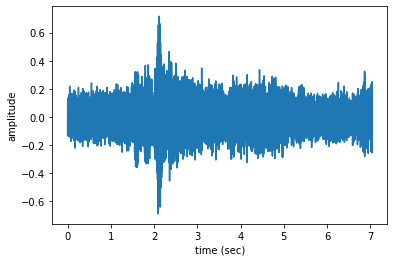

In [ ]:
n=0
fs = None # Sampling frequency
x, fs = librosa.load(files[n],sr=fs)
t = np.arange(len(x))/fs
plt.plot(t,x)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()
display(ipd.Audio(files[n]))

* Mel-frequency cepstral coefficients (MFCCs)

In audio sound processing, the mel-frequency cepstrum (MFC) is a representation of the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency which is a spectral representation of the audio clip where frequency warping can allow for better representation of sound.

Since, the frequency bands are distributed evenly in MFCC and they are much similar to the voice of human beings, thus, MFCC can efficiently be used to characterize speakers, for instance, it can be used to recognize the speaker's details for us here gender as it models the characteristics of the human voice.

(20, 607)


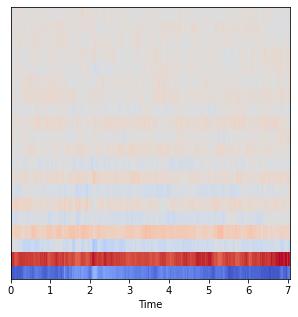

In [ ]:
import librosa.display
mfccs = librosa.feature.mfcc(x, fs)
print(mfccs.shape)

#Displaying  the MFCCs:
plt.figure(figsize=(5, 5))
librosa.display.specshow(mfccs, sr=fs, x_axis='time')

* Spectral centroid

This i audio feature is used to describe the center of gravity of the magnitude spectrum or, in other words, it indicates the central mass of the spectrum. It basically gives the frequency band where most of the energy is concentrated.

Here in MLEndLS audio dataset this has been used to differentiate the participants voice from the background noise. 

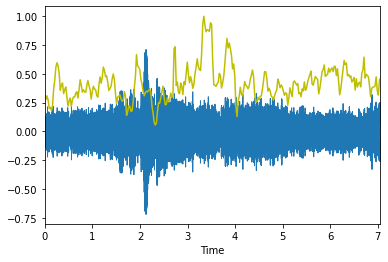

In [ ]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=fs)[0]
spectral_centroids.shape

# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, fs)
plt.plot(t, normalize(spectral_centroids), color='y')

# 5 Modelling

Logistic Regression is a classification technique used on this audio dataset. It uses a logistic function to model the dependent variable.
It is used while dealing with binary data (eg.: here either the participant is a male or female)

#6 Methodology

The train data snd test data have the same accuracy which shows that model used is good as there is no overfitting or underfitting, means the model is fit using all the data points and the prediction for each data point is compared with its actual output. 



#7 Dataset


In [ ]:
from google.colab import drive
import shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Data/MLEndLS'
os.listdir(path)

['MLEndLS_1.zip',
 'MLEndLS_3.zip',
 'MLEndLS_4.zip',
 'Folder4',
 'Folder5',
 'Folder2',
 'Folder1',
 'df_test1.csv']

In [ ]:
directory_to_extract_to = '/content/drive/MyDrive/Data/MLEndLS/Folder2/'
zip_path = '/content/drive/MyDrive/Data/MLEndLS/MLEndLS_3.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)
zip_path = '/content/drive/MyDrive/Data/MLEndLS/MLEndLS_1.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [ ]:
sample_path = '/content/drive/MyDrive/Data/MLEndLS/Folder1/*.wav'
files = glob.glob(sample_path)
len(files)

453

In [ ]:
sample_path = '/content/drive/MyDrive/Data/MLEndLS/Folder2/*.wav'
files = glob.glob(sample_path)
file_array=[]
import shutil
for file in files:
  file_array.append(str(file.split('/')[-1]))
print(len(file_array))
print(file_array)
df_test = pd.read_csv('./MLEndLS.csv')
filter1=df_test['in_out'].isin(['indoor'])
filter2=df_test['file_id'].isin(file_array)
df_test=df_test[filter1 & filter2]
print(df_test)
df_test=df_test.reset_index(drop=True)
df_test.to_csv('df_test.csv')
for i in range(len(df_test)):
  source=df_test.loc[i,'file_id']
  source=r'''/content/drive/MyDrive/Data/MLEndLS/Folder2/'''+ str(df_test.loc[i,'file_id'])
  dest=r'''/content/drive/MyDrive/Data/MLEndLS/Folder1/'''+ str(df_test.loc[i,'file_id'])
  shutil.copy(source,dest)
  #os.replace("")


1000
['1002.wav', '1004.wav', '1005.wav', '1003.wav', '1001.wav', '1007.wav', '1010.wav', '1008.wav', '1009.wav', '1006.wav', '1012.wav', '1011.wav', '1015.wav', '1014.wav', '1013.wav', '1016.wav', '1019.wav', '1017.wav', '1021.wav', '1018.wav', '1022.wav', '1020.wav', '1025.wav', '1023.wav', '1024.wav', '1026.wav', '1028.wav', '1027.wav', '1029.wav', '1031.wav', '1032.wav', '1030.wav', '1033.wav', '1035.wav', '1034.wav', '1036.wav', '1037.wav', '1039.wav', '1038.wav', '1040.wav', '1042.wav', '1041.wav', '1043.wav', '1045.wav', '1044.wav', '1046.wav', '1049.wav', '1048.wav', '1047.wav', '1050.wav', '1051.wav', '1052.wav', '1054.wav', '1053.wav', '1055.wav', '1056.wav', '1057.wav', '1058.wav', '1059.wav', '1060.wav', '1061.wav', '1062.wav', '1064.wav', '1063.wav', '1065.wav', '1067.wav', '1066.wav', '1068.wav', '1069.wav', '1070.wav', '1071.wav', '1072.wav', '1073.wav', '1074.wav', '1076.wav', '1075.wav', '1077.wav', '1079.wav', '1078.wav', '1080.wav', '1081.wav', '1082.wav', '1083.wav'

In [ ]:
MLENDLS_df = pd.read_csv('./df_test1.csv').set_index('file_id') 
MLENDLS_df

,Unnamed: 0,area,spot,in_out,Participant,gender
file_id,,,,,,
0002.wav,0,kensington,dinosaur,indoor,S127,male
0004.wav,1,kensington,hintze,indoor,S179,male
0007.wav,2,Euston,upper,indoor,S140,male
0013.wav,3,british,greatcourt,indoor,S66,male
0015.wav,4,campus,reception,indoor,S99,female
...,...,...,...,...,...,...
1493.wav,449,kensington,marine,indoor,S191,female
1495.wav,450,campus,reception,indoor,S40,female
1496.wav,451,kensington,dinosaur,indoor,S191,female


In [ ]:
for _ in range(50):
  n = np.random.randint(500)
  #display(ipd.Audio(files[n]))

In [ ]:
 for file in files:
  print(file.split('/')[-1])

1055.wav
1056.wav
1057.wav
1058.wav
1059.wav
1061.wav
1062.wav
1065.wav
1066.wav
1068.wav
1069.wav
1071.wav
1072.wav
1075.wav
1077.wav
1078.wav
1083.wav
1084.wav
1088.wav
1089.wav
1090.wav
1092.wav
1093.wav
1094.wav
1097.wav
1099.wav
1101.wav
1102.wav
1103.wav
1108.wav
1111.wav
1112.wav
1114.wav
1116.wav
1120.wav
1121.wav
1123.wav
1125.wav
1126.wav
1129.wav
1130.wav
1133.wav
1134.wav
1135.wav
1137.wav
1139.wav
1140.wav
1141.wav
1143.wav
1144.wav
1146.wav
1147.wav
1149.wav
1150.wav
1151.wav
1153.wav
1154.wav
1155.wav
1159.wav
0002.wav
1160.wav
1162.wav
1171.wav
1172.wav
1174.wav
1179.wav
1181.wav
1182.wav
1183.wav
1184.wav
1186.wav
1187.wav
1188.wav
1189.wav
1190.wav
1192.wav
1193.wav
1195.wav
1196.wav
1204.wav
1207.wav
1209.wav
1211.wav
1212.wav
1213.wav
1215.wav
1216.wav
1218.wav
1222.wav
1224.wav
1226.wav
1228.wav
1229.wav
1233.wav
1234.wav
1237.wav
1238.wav
1241.wav
1243.wav
1244.wav
1246.wav
1247.wav
1252.wav
1260.wav
1264.wav
1265.wav
1266.wav
1267.wav
1269.wav
1270.wav
1271.wav
1

In [ ]:
MLENDLS_df.loc[files[n].split('/')[-1]]

Unnamed: 0         93
area           campus
spot           ground
in_out         indoor
Participant       S57
gender         female
Name: 0229.wav, dtype: object

In [ ]:
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

In [ ]:
def getXy(files,labels_file, scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  for file in files:
    fileID = file.split('/')[-1]
    file_name = file.split('/')[-1]
    yi = labels_file.loc[fileID]['gender']=='female'

    fs = None # if None, fs would be 22050
    x, fs = librosa.load(file,sr=fs)
    if scale_audio: x = x/np.max(np.abs(x))
    f0, voiced_flag = getPitch(x,fs,winLen=0.02)
    print("-------")
    print(len(f0))
    print(len(voiced_flag))
    print("-------")
      
    power = np.sum(x**2)/len(x)
    pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
    pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
    voiced_fr = np.mean(voiced_flag)
    mfccs = librosa.feature.mfcc(x, sr=fs)
    spectral_centroid = librosa.feature.spectral_centroid(x, sr=fs)

    xi = [power,pitch_mean,pitch_std,voiced_fr,np.mean(mfccs), np.mean(spectral_centroid)]
    X.append(xi)
    y.append(yi)

  return np.array(X),np.array(y)

In [ ]:
X,y = getXy(files, labels_file=MLENDLS_df, scale_audio=True, onlySingleDigit=True)

-------
607
607
-------
-------
669
669
-------
-------
640
640
-------
-------
662
662
-------
-------
615
615
-------
-------
659
659
-------
-------
571
571
-------
-------
607
607
-------
-------
774
774
-------
-------
603
603
-------
-------
733
733
-------
-------
712
712
-------
-------
802
802
-------
-------
666
666
-------
-------
665
665
-------
-------
675
675
-------
-------
750
750
-------
-------
789
789
-------
-------
813
813
-------
-------
639
639
-------
-------
605
605
-------
-------
920
920
-------
-------
741
741
-------
-------
628
628
-------
-------
712
712
-------
-------
660
660
-------
-------
939
939
-------
-------
683
683
-------
-------
612
612
-------
-------
808
808
-------
-------
767
767
-------
-------
670
670
-------
-------
672
672
-------
-------
660
660
-------
-------
607
607
-------
-------
657
657
-------
-------
647
647
-------
-------
779
779
-------
-------
739
739
-------
-------
830
830
-------
-------
644
644
-------
-------
660
660


In [ ]:
print('The shape of X is', X.shape) 
print('The shape of y is', y.shape)
print('The labels vector is', y)


The shape of X is (453, 6)
The shape of y is (453,)
The labels vector is [ True  True  True False False False False  True False  True  True False
 False  True  True  True False False False  True False False  True False
 False  True False False  True  True  True False  True  True  True  True
 False False False False False  True  True  True  True  True  True  True
  True False False False False  True  True False False False False False
 False False  True False False False False  True False  True False False
 False False False False  True False False False  True  True False False
 False False False  True False  True  True  True  True False False False
 False False False  True  True False False False False False False False
 False False  True  True False  True  True False  True  True  True False
 False  True False False False  True False  True False False False False
 False  True  True False False  True False  True False  True False False
  True  True  True False False  True  True False Fa

# 8 Results

Using the SVM classifer the Training Accuracy was 0.5930599369085173 and Validation  Accuracy 0.6985294117647058
and after normalisation the Training Accuracy 0.9905362776025236 and Validation  Accuracy 0.8161764705882353.

Which is not clear as the dataset shows overfitting instead i changed the model to Logistic Regression where both the training dataset and validation are almost appromiate to 75% which is a better model for my problem solution.

Our Logistic Regression model does quite well, making it a robust, straightforward
and reliable method of doing gender classification.

In [ ]:
print(' The number of male recordings is ', np.count_nonzero(y))
print(' The number of female recordings is ', y.size - np.count_nonzero(y))

 The number of male recordings is  170
 The number of female recordings is  283


In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((317, 6), (136, 6), (317,), (136,))

In [ ]:
model  = svm.SVC(C=1)
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.5930599369085173
Validation  Accuracy 0.6985294117647058
The support vectors are (261, 6)


In [ ]:
mean = X_train.mean(0)
sd =  X_train.std(0)

X_train = (X_train-mean)/sd
X_val  = (X_val-mean)/sd

model  = svm.SVC(C=1,gamma=2)
model.fit(X_train,y_train)

yt_p = model.predict(X_train)

yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.9905362776025236
Validation  Accuracy 0.8161764705882353
The support vectors are (261, 6)


In [ ]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train,y_train)


LogisticRegression()

In [ ]:
yt_p = logistic.predict(X_train)
yv_p = logistic.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))


Training Accuracy 0.7570977917981072
Validation  Accuracy 0.7573529411764706


#9 Conclusions
The Logistic Regression  model predicts the training data and validation data to be almost approximate which concludes that this model is the best for this promblem as there is no over fitting of data.